<a href="https://colab.research.google.com/github/MadmanMarble/MadmanMarble/blob/main/Image_processing_planet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages('gdalutils')
install.packages('sf')
install.packages('raster')
install.packages('exactextractr')
install.packages("googledrive")
install.packages("googletoken")
install.packages("DBI")
install.packages("RSQLite")
install.packages("RPostgreSQL")

# New Section

In [ ]:
library(ggplot2)
library(sf)
library(magrittr)
library(data.table)
library(raster)
library(exactextractr)
library(googledrive)
library(DBI)
library(zip)

In [3]:
drive_auth(use_oob = TRUE, cache = FALSE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=f4bdab7dbdb79326e82361cb55594545&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWZKb2hYa3VZWmdXaXdtZHExcE1CaGgwLWVCVEFOSFlJbWU0OU9sTmhkdHFxckZsVHdkQjJTOGZjb21ETmg1bkV1Rl9ZZyIsInN0YXRlIjoiZjRiZGFiN2RiZGI3OTMyNmU4MjM2MWNiNTU1OTQ1NDUifQ==


In [42]:
dir.create('/content/kawainuiMarsh/')

In [ ]:
# kawainui
# CCAP:  https://drive.google.com/file/d/1MBJco_pyfEV8qPJkn6KWUTiunx7303xg/view?usp=drive_link
drive_download(file = as_id('1MBJco_pyfEV8qPJkn6KWUTiunx7303xg'), path =  '/content/kawainuiMarsh/kawainui_ccap.tif', overwrite = TRUE)

# Planet Labs:

# https://drive.google.com/file/d/11CWSS5kyeFd7X1KtswZFWuXcG-iTiNX2/view?usp=drive_link,
drive_download(file = as_id('11CWSS5kyeFd7X1KtswZFWuXcG-iTiNX2'), path =  '/content/kawainuiMarsh/k_2018_01.tif', overwrite = TRUE)
# https://drive.google.com/file/d/1-B7GSdvGwqw2eMfknT4B5j8uhU6UTMhU/view?usp=drive_link,
drive_download(file = as_id('1-B7GSdvGwqw2eMfknT4B5j8uhU6UTMhU'), path =  '/content/kawainuiMarsh/k_2018_02.tif', overwrite = TRUE)
# https://drive.google.com/file/d/1-U6JJ3c8bDw62SYQj0-65hI6w1rzotcD/view?usp=drive_link,
drive_download(file = as_id('1-U6JJ3c8bDw62SYQj0-65hI6w1rzotcD'), path =  '/content/kawainuiMarsh/k_2018_06.tif', overwrite = TRUE)
# https://drive.google.com/file/d/10XDN7zfplFwYboU4GyWe52CVdBjGDE-9/view?usp=drive_link
drive_download(file = as_id('10XDN7zfplFwYboU4GyWe52CVdBjGDE-9'), path =  '/content/kawainuiMarsh/k_2018_011.tif', overwrite = TRUE)

In [44]:
ccap_raster <- stack('/content/kawainuiMarsh/kawainui_ccap.tif')
planet_raster <- stack('/content/kawainuiMarsh/k_2018_01.tif', '/content/kawainuiMarsh/k_2018_02.tif', '/content/kawainuiMarsh/k_2018_06.tif', '/content/kawainuiMarsh/k_2018_011.tif')

In [45]:
planet_raster_extended <- extend(planet_raster, projectExtent(ccap_raster, planet_raster), value=NA)

In [46]:
ccap_raster
planet_raster

class      : RasterStack 
dimensions : 2860, 2476, 7081360, 1  (nrow, ncol, ncell, nlayers)
resolution : 2.4, 2.4  (x, y)
extent     : 625878.8, 631821.2, 2361768, 2368632  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=4 +datum=WGS84 +units=m +no_defs 
names      : Layer_1 


class      : RasterStack 
dimensions : 2290, 1983, 4541070, 16  (nrow, ncol, ncell, nlayers)
resolution : 3, 3  (x, y)
extent     : 625875, 631824, 2361765, 2368635  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=4 +datum=WGS84 +units=m +no_defs 
names      : k_2018_01_1.1, k_2018_01_1.2, k_2018_01_1.3, k_2018_01_1.4, k_2018_02_1.1, k_2018_02_1.2, k_2018_02_1.3, k_2018_02_1.4, k_2018_06_1.1, k_2018_06_1.2, k_2018_06_1.3, k_2018_06_1.4, k_2018_011_1.1, k_2018_011_1.2, k_2018_011_1.3, ... 


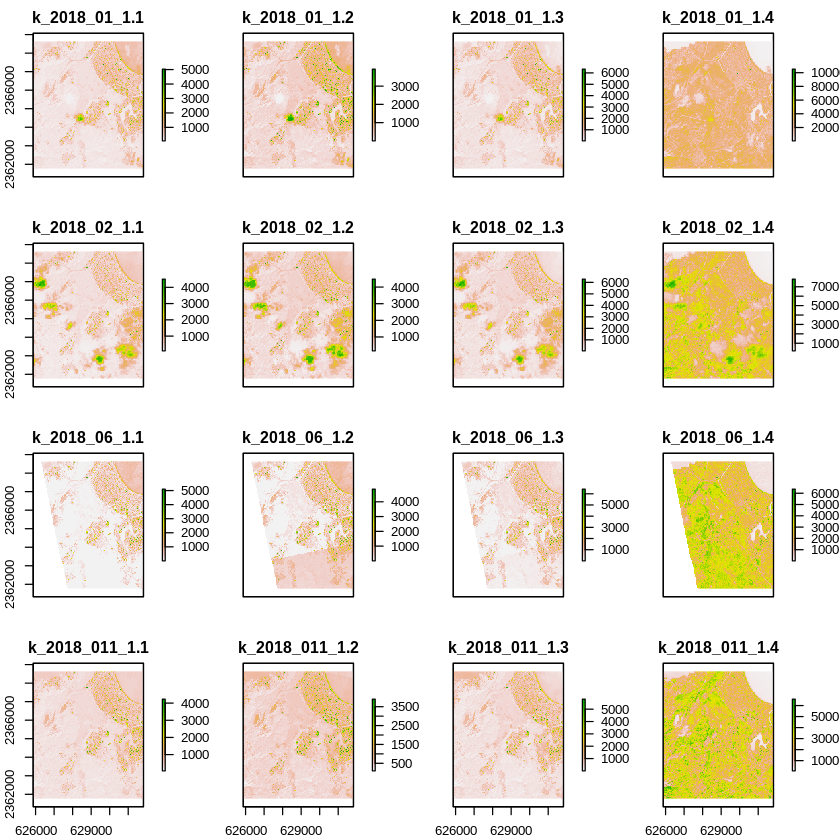

In [57]:
# planet_raster[[13]] %>% plot
planet_raster %>% plot

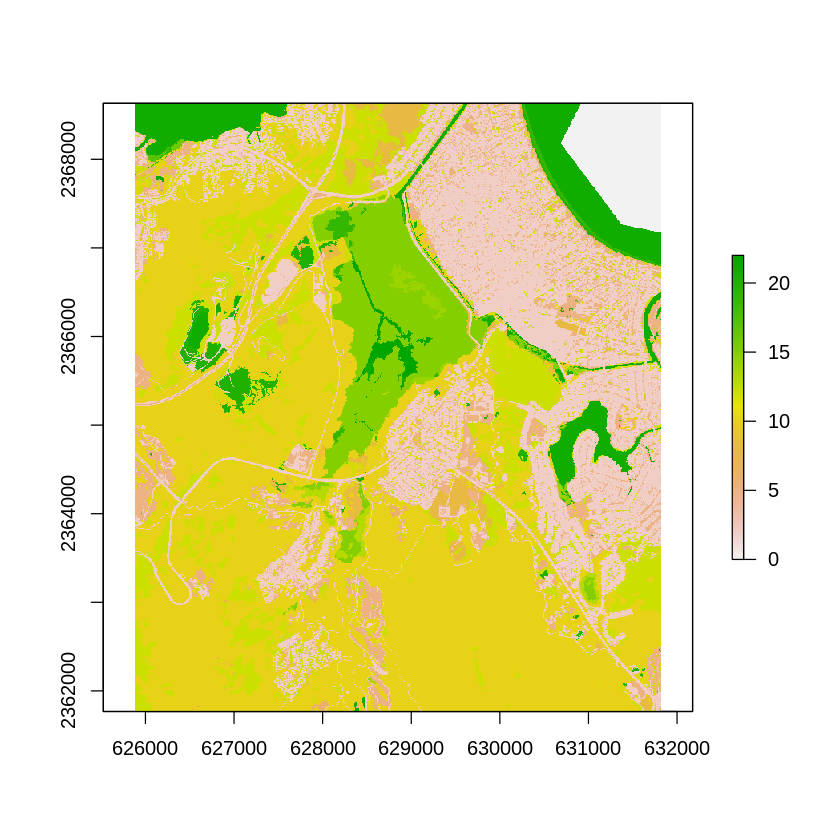

In [48]:
ccap_raster %>% plot

In [55]:
ncol(ccap_raster)

nrow(ccap_raster)


y_end <- c(seq(1,ccap_raster %>% nrow,512),nrow(ccap_raster))[-1]
x_end <- c(seq(1,ccap_raster %>% ncol,512),ncol(ccap_raster))[-1]

extract_grid <- expand.grid(x_end,y_end) %>% data.table

names(extract_grid) <- c('x_end','y_end')

extract_grid$x_org <- extract_grid$x_end - 512
extract_grid$y_org <- extract_grid$y_end - 512

extract_grid$id <- 1:nrow(extract_grid)

[1] 2476

[1] 2860

In [56]:
# dir.create('/TrainingData/Niihau')
# Specify the path for the new folder/directory
new_folder_path <- "/content/kawainuiMarsh/Images"
new_folder_path2 <- "/content/kawainuiMarsh/Labels"
# Use dir.create to create the new folder
dir.create(new_folder_path, showWarnings = FALSE)

# Check if the folder was created successfully
if (file.exists(new_folder_path)) {
  cat("Folder created:", new_folder_path, "\n")
} else {
  cat("Failed to create folder:", new_folder_path, "\n")
}


# Use dir.create to create the new folder
dir.create(new_folder_path2, showWarnings = FALSE)
# Check if the folder was created successfully
if (file.exists(new_folder_path2)) {
  cat("Folder created:", new_folder_path2, "\n")
} else {
  cat("Failed to create folder:", new_folder_path2, "\n")
}

Folder created: /content/kawainuiMarsh/Images 
Folder created: /content/kawainuiMarsh/Labels 


In [59]:
result_dt <-
1:nrow(extract_grid) %>% lapply(function(x){

  nrow <- 0
  ncol <- 0
  i <- 0
  while(nrow !=512 | ncol != 512){
    i <- i + 1
    # Calculate the geographic coordinates for the cropping extent
    xmin <- xFromCol(ccap_raster, extract_grid[x,]$x_org) + rnorm(1)*.01*2.4
    xmax <- xFromCol(ccap_raster, extract_grid[x,]$x_end) + rnorm(1)*.01*2.4
    ymin <- yFromRow(ccap_raster, extract_grid[x,]$y_end) + rnorm(1)*.01*2.4 # Note row_max as raster origin is top-left
    ymax <- yFromRow(ccap_raster, extract_grid[x,]$y_org) + rnorm(1)*.01*2.4 # Note row_min as raster origin is top-left

    e <- extent(xmin, xmax, ymin, ymax)

    ccap_cropped_raster <- crop(ccap_raster, e)

    nrow <- nrow(ccap_cropped_raster)
    ncol <- ncol(ccap_cropped_raster)


    # print(dim(ccap_cropped_raster))
    if(i>1000){return('failed to converge')}
    }

  ls_cropped_raster <- crop(ls_raster_extended, projectExtent(ccap_cropped_raster,ls_raster))

  ls_resampled_raster <- projectRaster(ls_cropped_raster,ccap_cropped_raster)
  print(ls_resampled_raster)
  pixel_table <- (table(values(ccap_cropped_raster))/ncell(ccap_cropped_raster)) %>% data.table

  names(pixel_table) <- c('label','percent')

  out_dt <- data.table(extract_grid[x,],xmin = xmin,xmax =xmax,ymin= ymin,ymax, pixel_table)

  if(ls_resampled_raster %>% nrow ==512 & ls_resampled_raster %>% ncol ==512 & ccap_cropped_raster%>% nrow ==512 & ccap_cropped_raster%>% ncol ==512){
    ls_resampled_raster %>%
    writeRaster(., paste("/content/kawainuiMarsh/Images/",extract_grid[x,]$x_org,'_',extract_grid[x,]$y_org,'.tif',sep=''),overwrite=T)

    ccap_cropped_raster %>%
    writeRaster(., paste("/content/kawainuiMarsh/Labels/",extract_grid[x,]$x_org,'_',extract_grid[x,]$y_org,'.tif',sep=''),overwrite=T)
  }else(print('uh oh'))

  return(out_dt)
})
result_dt[ result_dt %>% lapply(function(x){is.data.table(x)}) %>% unlist] %>% rbindlist %>%
fwrite("/content/kawainuiMarsh/kawainuimarsh2018.csv")

class      : RasterBrick 
dimensions : 512, 512, 262144, 8  (nrow, ncol, ncell, nlayers)
resolution : 2.4, 2.4  (x, y)
extent     : 625878.8, 627107.6, 2367401, 2368630  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=4 +datum=WGS84 +units=m +no_defs 
source     : memory
names      : kawainui_//_01_26_1.1, kawainui_//_01_26_1.2, kawainui_//_01_26_1.3, kawainui_//_01_26_1.4, kawainui_//1_26_2_1.1, kawainui_//1_26_2_1.2, kawainui_//1_26_2_1.3, kawainui_//1_26_2_1.4 
min values :              68.83330,               1.00000,              20.39714,             102.99643,                    NA,                    NA,                    NA,                    NA 
max values :              4323.698,              3930.460,              5824.363,              6577.091,                    NA,                    NA,                    NA,                    NA 

class      : RasterBrick 
dimensions : 512, 512, 262144, 8  (nrow, ncol, ncell, nlayers)
resolution : 2.4, 2.4  (x, y)
extent     

In [ ]:
# visualize the newly created tif files.

# Replace with the path to your .tif file
tif_file_path <- "/content/kawainui/Images/1025_1025.tif"

# Load the .tif file
tif_data <- raster(tif_file_path)

# Plot the .tif file
plot(tif_data)


In [ ]:
# visualize the newly created tif files.

# Replace with the path to your .tif file
tif_file_path <- "/content/kawainui/Labels/1025_1025.tif"

# Load the .tif file
tif_data <- raster(tif_file_path)

# Plot the .tif file
plot(tif_data)

In [60]:
zip(zipfile = "/content/kawainuimarsh2018.zip",
    files = c("/content/kawainuiMarsh/Images",
              "/content/kawainuiMarsh/Labels",
              "/content/kawainuiMarsh/kawainuimarsh2018.csv"))

Warning message in fix_absolute_paths(data$key):
“Dropping leading `/` from paths, all paths in a zip file must be relative paths.”


In [61]:
# save to processed_data https://drive.google.com/drive/folders/1d_Ix2hIbwtT2XAqtzncui2jPq13vKOoe?usp=drive_link
drive_upload(media = "/content/kawainuimarsh2018.zip", path = as_id("1d_Ix2hIbwtT2XAqtzncui2jPq13vKOoe"))

Local file:

• /content/kawainuimarsh2018.zip

Uploaded into Drive file:

• kawainuimarsh2018.zip <id: 1GEgqWZv8Zeyl4B-ZUdofsSZwE3cZM6t6>

With MIME type:

• application/zip

